In [1]:
# 1) Define model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction and loss
#   - backward pass: gradients
#   - update weights

import torch
import torch.nn as nn # nn stands for neural networks
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

'X Tensor with dimension 100 x 1'

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156]])

'y Tensor with dimension 1 x 100'

tensor([-55.5386, -10.6620,  22.7574, 101.0961, 144.3376,  33.2888,  33.0153,
        -25.8870, -99.6391,  23.8031])

'y Tensor with dimension 1 x 100'

tensor([[-55.5386],
        [-10.6620],
        [ 22.7574],
        [101.0961],
        [144.3376],
        [ 33.2888],
        [ 33.0153],
        [-25.8870],
        [-99.6391],
        [ 23.8031]])

'Number of samples'

100

'Number of feautres'

1

epoch: 10, loss = 578.4214
epoch: 20, loss = 340.9465
epoch: 30, loss = 332.8589
epoch: 40, loss = 332.5778
epoch: 50, loss = 332.5679
epoch: 60, loss = 332.5676
epoch: 70, loss = 332.5676
epoch: 80, loss = 332.5676
epoch: 90, loss = 332.5676
epoch: 100, loss = 332.5676


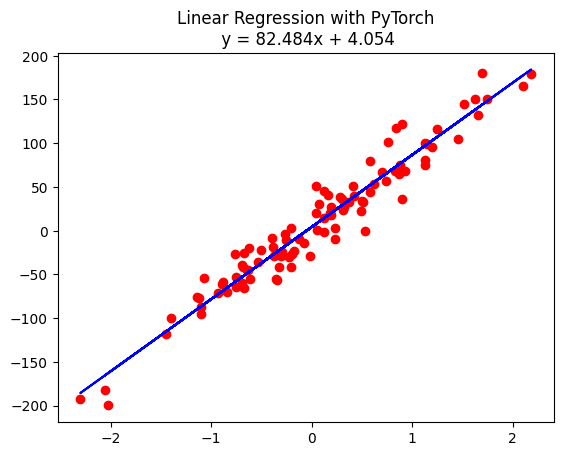

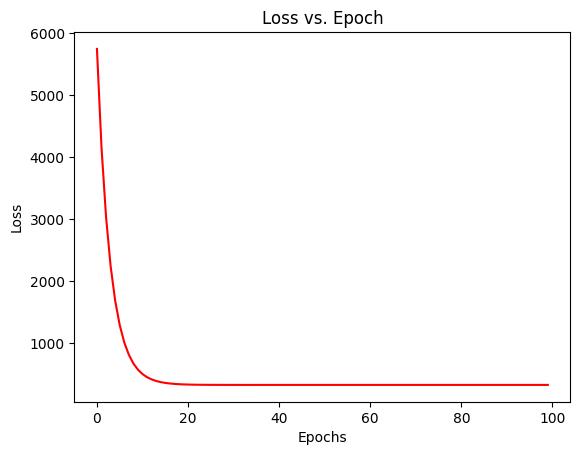

In [17]:
# 0) Prepare data

## get regression data from sklearn
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

## convert numpy arrays to torch tensores
X = torch.from_numpy(X_numpy.astype(np.float32)) # 100 x 1
display("X Tensor with dimension 100 x 1", X[:10])
y = torch.from_numpy(y_numpy.astype(np.float32)) # 1 x 100
display("y Tensor with dimension 1 x 100", y[:10])

## reshape y into a column vector
y = y.view(y.shape[0], 1) # 100 x 1
display("y Tensor with dimension 1 x 100", y[:10])

## define sample and feature size
n_samples, n_features = X.shape
display("Number of samples", n_samples)
display("Number of feautres", n_features)

# 1) model 

## define input size and output size
input_size = n_features # input dimension for model
output_size = 1 # output dimension for model

## create linear model
model = nn.Linear(in_features=input_size, out_features=output_size)

# 2) loss and optimizer
## define learning rate
learning_rate = 0.1

## define criterion (loss function)
criterion = nn.MSELoss()

## define optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop

### create empty list to store losses and epochs
loss_values = []
epochs_values = []

## define number of epochs (learning iterations)
num_epochs = 100
for epoch in range(num_epochs):
    
    ## forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    ## backward pass
    loss.backward() # does backpropagation and calculates gradients

    ## update weights
    optimizer.step()

    ## empty gradients (otherwise they will accumulate)
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

    ### append loss and epoch to lists
    loss_values.append(loss.item())
    epochs_values.append(epoch)


## create linear Regression plot
predicted = model(X).detach().numpy() # detach() creates a new tensor and prevents gradient tracking, numpy() converts tensor to numpy array

## get the coefficients
weight = model.weight.detach().numpy()[0][0]
bias = model.bias.detach().numpy()[0]

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.title(f"Linear Regression with PyTorch\n y = {weight:.3f}x + {bias:.3f}")
plt.show()


## create loss plot
plt.plot(epochs_values, loss_values, c="r")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.show()
